# K Means

Alan Muñoz - A01252054

**Equipo**
* Alan Muñoz
* Antonio Bojorquez
* Cesar Galvez
* Nickolas Rodriguez

En esta actividad encontrarás patrones de tus datos utilizando la técnica de clustering k-means

1. Carga tus datos
2. Si determinas que alguna variable no sirve basándose en la actividad pasada, elimínala y justifica por qué quitaste o no variables.
3. Determina un valor de k
4. Utilizando scikit-learn calcula los centros del algoritmo k-means

LINK GITHUB - https://github.com/alanjmr21/TC1002S_A01252054

### Manual

1. Se debe abrir la terminal y escribir el comando jupyter notebook
2. Al abrir este editor de codigo, se puede escribir en la casilla inicial la carga de librerias y presionar el boton RUN en el menu superior de este editor.
3. Para agregrar otra casilla hay un boton con el signo + en el mismo menu mencionado, esto hara que se abra otra casilla para escribir codigo. Ahi se escribe las segunda parte del codigo que es "Carga de Archivo".
4. Se repiten los mismos pasos para correr el resto codigo.

## Importar Librerias

In [2]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import matplotlib.pylab as plt
import numpy as np

## Carga del Archivo: Child Smokers

En esta seccion se carga el archivo y para vizualizar mejor las variables "smoker" y "sex" se cambian a valores numericos, 1 para persona que si fuma 0 para persona que no, los mismo con sex, 0 para female y 1 para male.

Despues mostramos parte de dataframe

In [3]:
# Leer los datos a analizar
csmk = pd.read_csv("Child Smokers.csv", na_values = ' ')
print('shape: ', csmk.shape)
csmk = csmk.replace('non', 0)
csmk = csmk.replace('smoker', 1)
csmk = csmk.replace('female', 0)
csmk = csmk.replace('male', 1)
csmk


shape:  (654, 5)


,Age (years),Height (cm),FEV (litres),Sex,Smoker
0,9,145,1.708,0,0
1,8,171,1.724,0,0
2,7,138,1.720,0,0
3,9,135,1.558,1,0
4,9,145,1.895,1,0
...,...,...,...,...,...
649,15,152,2.278,0,1
650,16,183,4.872,1,1
651,16,170,4.270,1,1
652,15,173,3.727,1,1


## Mapa de Calor

En esta seccion se obtiene una matrix de correlacion con el metodo .corr(), despues esta matriz es pasada a un mata de calor con la funcion .heatmap() dentro de la libreria seaborn, importada como sns. 

En esta grafica se puede apreciar de manera mas visual las relaciones que existen entres las variables, siendo los colores mas claros relaciones positivas o cercanas a 1 y los mas oscuros relaciones mas cercanas a cero o negativas.

En el caso de nuestro dataset se puede observar de primera instancia que hay datos relacionados como el FEV y la altura o la altura y la edad. Asimismo, en la variable de somker, se puede observar una correlación negativa únicamente con el sexo y la variable que mas relaciones positiva tiene con este es la edad.

<AxesSubplot:>

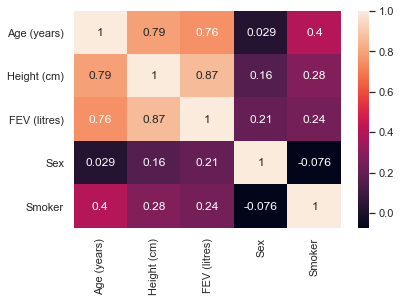

In [4]:
# Se obtiene una matriz de correlación
correlation_matrix = csmk.corr().round(3)
# Se usa la matriz de correlación para dibujar un mapa de calor
# annot = True para mostrar los valores dentro del cuadro
sns.heatmap(data=correlation_matrix, annot=True)

## Uso de K Mean

En esta seccion se modificaron los datos numericos del dataframe de manera que solo se encontraran en el rango de 0 a 1. De esta manera el K mean puede funcionar de manera mas optima.

In [6]:
# Aplicar escalamiento [0,1] a todos los valores
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [8]:
# Transformación del DataFrame original
csmk_1 = csmk
csmk_2 = min_max.fit_transform(csmk_1.values)
csmk_2 = pd.DataFrame(csmk_2, columns=csmk_1.columns)
csmk_2

,Age (years),Height (cm),FEV (litres),Sex,Smoker
0,0.3750,0.394366,0.183327,0.0,0.0
1,0.3125,0.760563,0.186525,0.0,0.0
2,0.2500,0.295775,0.185726,0.0,0.0
3,0.3750,0.253521,0.153339,1.0,0.0
4,0.3750,0.394366,0.220712,1.0,0.0
...,...,...,...,...,...
649,0.7500,0.492958,0.297281,0.0,1.0
650,0.8125,0.929577,0.815874,1.0,1.0
651,0.8125,0.746479,0.695522,1.0,1.0
652,0.7500,0.788732,0.586965,1.0,1.0


### Clasificacion por K Means

En esta parte importamnos K means del sklearn.cluster para agrupar nuestros datos y observar que variables muestran mayor distribucion y por ende resultan mas significativas al momento de hacer analisis estadistico.

In [6]:
# Uso de clasificación por KMeans
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(csmk_2)
clu.cluster_centers_

array([[3.97849462e-01, 4.84072896e-01, 3.17515288e-01, 6.66133815e-16,
        1.52655666e-16],
       [4.17943548e-01, 5.53066788e-01, 3.88520721e-01, 1.00000000e+00,
        1.66533454e-16],
       [6.57692308e-01, 7.11809317e-01, 4.96973518e-01, 4.00000000e-01,
        1.00000000e+00]])

In [9]:
# Uso de clasificación por KMeans
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=6)
clu.fit(csmk_2)
clu.cluster_centers_

array([[6.41025641e-01, 6.61610690e-01, 4.34815817e-01, 0.00000000e+00,
        1.00000000e+00],
       [3.04142442e-01, 3.87078284e-01, 2.49025971e-01, 1.00000000e+00,
        1.24900090e-16],
       [4.90968208e-01, 5.89839616e-01, 3.95862464e-01, 3.33066907e-16,
        5.55111512e-17],
       [5.59782609e-01, 7.59951010e-01, 5.62383742e-01, 1.00000000e+00,
        6.93889390e-17],
       [6.82692308e-01, 7.87107259e-01, 5.90210070e-01, 1.00000000e+00,
        1.00000000e+00],
       [2.45872642e-01, 3.11453627e-01, 1.89646783e-01, 4.44089210e-16,
        8.32667268e-17]])

In [10]:
# Uso de clasificación por KMeans
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=14)
clu.fit(csmk_2)
clu.cluster_centers_

array([[ 3.95000000e-01,  5.17934272e-01,  3.23350660e-01,
         1.00000000e+00, -6.93889390e-17],
       [ 4.52963918e-01,  5.82401626e-01,  3.84405001e-01,
         2.22044605e-16,  0.00000000e+00],
       [ 6.41025641e-01,  6.61610690e-01,  4.34815817e-01,
         0.00000000e+00,  1.00000000e+00],
       [ 7.43421053e-01,  8.27279466e-01,  6.72236369e-01,
         1.00000000e+00,  1.00000000e+00],
       [ 1.57094595e-01,  1.96421774e-01,  1.58061100e-01,
         1.00000000e+00, -5.55111512e-17],
       [ 1.14583333e-01,  1.38497653e-01,  1.09564508e-01,
        -2.22044605e-16, -2.77555756e-17],
       [ 7.75568182e-01,  8.80921895e-01,  7.71018865e-01,
         1.00000000e+00, -2.77555756e-17],
       [ 5.72010870e-01,  8.16289039e-01,  6.38262086e-01,
         1.00000000e+00, -6.93889390e-17],
       [ 3.34166667e-01,  4.48262911e-01,  2.66871918e-01,
         1.11022302e-16,  0.00000000e+00],
       [ 6.44531250e-01,  6.60504695e-01,  4.73285686e-01,
        -2.22044605e-16

Al analizar los grupos formados, pudimos observar que la cantidad de clusters generalmente se puede reducir a 3 grupos y que la variable con una mayor distribucion es la del sexo.

# Preguntas del Reporte

**1. ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?**

Estos centros pueden ser utilizados, hay algunos con gran diferencia como es el caso de columna 4, 
y otros relevantes pero no tan impactantes como columnas 1, 2 y 3.

**2. ¿Cómo obtuviste el valor de k a usar?** 

Probamos primero con k=3 y vimos varios grupos de 3 y algunos de 2, luego probamos ç
con valores más altos como k=6 y comprobamos que cuando mucho hay grupos de 3.

**3. ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?** 

Con un valor más alto la cantidad de grupos sigue siendo la misma, y con un valor más 
bajo simplificamos demasiado, por lo que ninguno funciona tan bien.

**4. ¿Qué distancia tienen los centros entre sí?**

Dependiendo de la variable, los centros mantienen distancias cortas o grandes entre sí. En la primera variable (Edad), hay cantidades que difieren por 0.57 unidades. En la segunda (Altura) difieren por 0.22 unidades aprox. En la tercera (FEV Liters) por 0.17, en la cuarta (Sex) difieren de 0.7 a 1 y en la quinta (Smoker) casi todos los resultados de los clusters son iguales.  

**5. ¿Hay alguno que este muy cercano a otros?** 

Los centros de la columna 3 están bastante cerca los unos de los otros, con diferencia de 1 más o menos, y en la columna 5 hay dos que son básicamente el mismo, con un valor cercano a cero.

**6. ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?** 

Si tuviéramos una gran cantidad de outliers en nuestros boxplots, podríamos aclarar que varios de los participantes no pertenecen al rango de estudio que se evaluó o mejor dicho, estos al final no terminaron teniendo datos relevantes al estudio de los jóvenes fumadores.

**7. ¿Qué puedes decir de los datos basándose en los centros?**

Basándonos en los centros podemos concluir que el margen de fumadores en jóvenes es uno pequeño pero esto aún indica la existencia de jóvenes fumadores en el conjunto de datos.


